#Bioinspired Artificial Intelligence Algorithms - ACO

Creating the edges

In [1]:
import random

ab = ['AB',['BC','BD'],8,1]
ac = ['AC',['BC','BD'],14,1]
ad = ['AD',[],22,1]
bc = ['BC',['CD'],7,1]
cb = ['CB',['BD'],9,1]
bd = ['BD',[],8,1]
cd = ['CD',[],10,1]

edges = [ab,ac,ad,bc,cb,bd,cd]

In [2]:
bd[2]

8

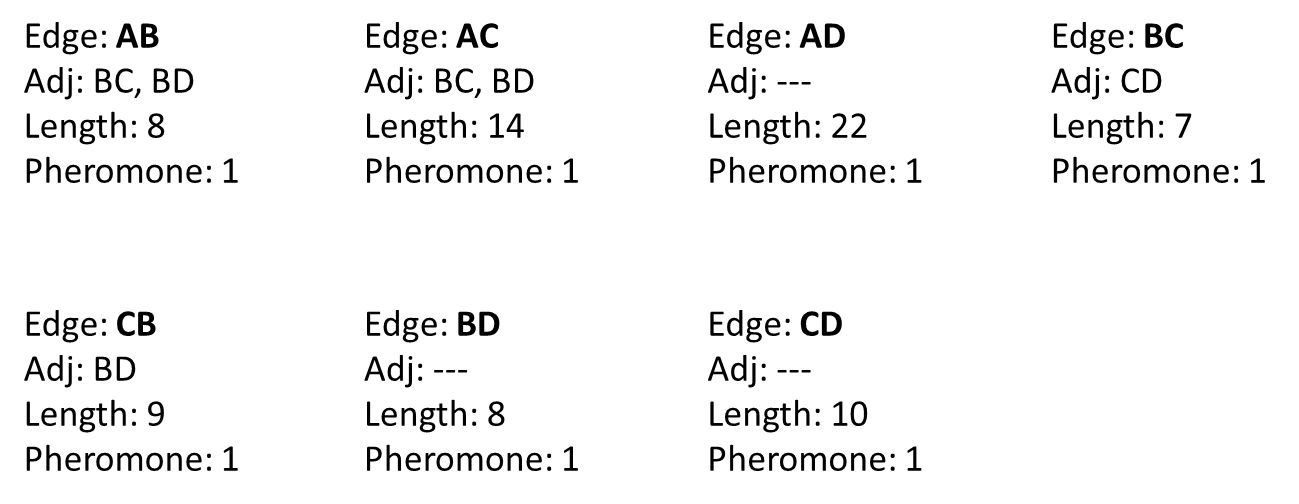

Probability of edge selection

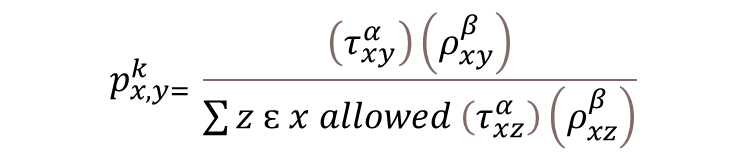

In [3]:
def probabs(adja):
  dists = []
  fer = []
  for i in adja:
    for j in edges:
      if j[0] == i:
        dists.append(j[2])
        fer.append(j[3])

  attractivities = []
  count = 0
  while count < len(adja):
    atract = fer[count]*(1/(dists[count]))
    attractivities.append(atract)
    count += 1

  summ = sum(attractivities)
  probs = []
  for i in attractivities:
    prob = (i/summ)
    probs.append(prob)

  return probs


In [4]:
probabs(['BC','BD'])

[0.5333333333333333, 0.4666666666666667]

Choosing adjacent edges

In [5]:
def chooseEdges(adjs):
  probab = probabs(adjs)
  thresholds = []
  summ = 0
  for i in probab:
    summ += i
    thresholds.append(summ)
  r = random.random()
  count = 0
  for i in thresholds:
    if r > i:
      count += 1
  return adjs[count]


In [6]:
probabs(['AB','AC','AD'])


[0.5167785234899329, 0.2953020134228188, 0.18791946308724833]

In [7]:
chooseEdges(['AB','AC','AD'])



'AC'

Function of ant/path

In [8]:
def ant():
  starters = [ab,ac,ad]
  path = []

  starter = chooseEdges(['AB','AC','AD'])
  path.append(starter)

  if 'D' in path[-1]:
    return path
  else:
    while True:
      for i in edges:
        if path[-1] == i[0]:
          adj = i[1]
          if len(adj)==0:
            break
          else:
            adj_random = chooseEdges(adj)
            path.append(adj_random)
      return path
      break


In [9]:
ant()






['AB', 'BC', 'CD']

Path length calculation

In [10]:
def length(ant):
  summ = 0
  for i in ant:
    for j in edges:
      if i == j[0]:
        summ += j[2]
  return summ


In [11]:
length(['AD'])


22

Updating pheromone levels

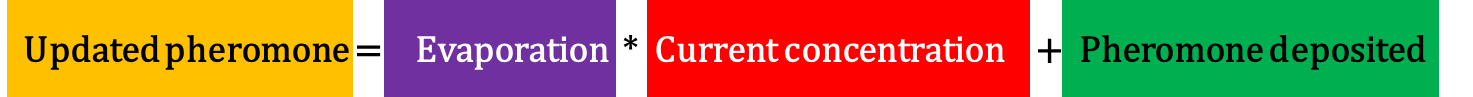

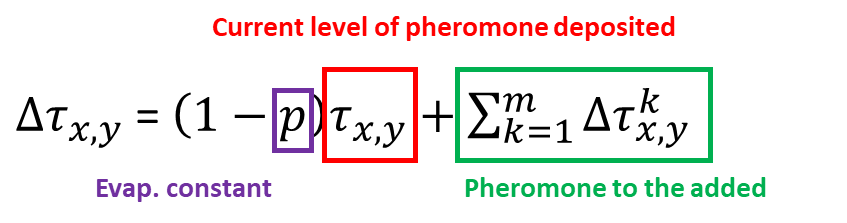

In [12]:
#Pheromone evaporation

def evaporation(evap):
  for i in edges:
    i[3] = i[3]*(1-evap)

#Pheromone Update

def update_pherom(ants):
  for i in ants:
    pherom = 1/(length(i))
    for j in i:
      for k in edges:
        if k[0] == j:
          k[3] = k[3] + pherom


In [13]:
for i in edges:
  print(i)


['AB', ['BC', 'BD'], 8, 1]
['AC', ['BC', 'BD'], 14, 1]
['AD', [], 22, 1]
['BC', ['CD'], 7, 1]
['CB', ['BD'], 9, 1]
['BD', [], 8, 1]
['CD', [], 10, 1]


In [14]:
evaporation(0.3)

for i in edges:
  print(i)



['AB', ['BC', 'BD'], 8, 0.7]
['AC', ['BC', 'BD'], 14, 0.7]
['AD', [], 22, 0.7]
['BC', ['CD'], 7, 0.7]
['CB', ['BD'], 9, 0.7]
['BD', [], 8, 0.7]
['CD', [], 10, 0.7]


In [15]:
ants = [['AB','BD'],['AD']]
update_pherom(ants)

for i in edges:
  print(i)




['AB', ['BC', 'BD'], 8, 0.7625]
['AC', ['BC', 'BD'], 14, 0.7]
['AD', [], 22, 0.7454545454545454]
['BC', ['CD'], 7, 0.7]
['CB', ['BD'], 9, 0.7]
['BD', [], 8, 0.7625]
['CD', [], 10, 0.7]


Running the algorithm

In [16]:
#Running the algorithm

for i in range(10):
  evaporation(0.3)
  ants = []
  for j in range(5):
    ants.append(ant())
  update_pherom(ants)


for i in edges:
  print(i[0],i[3])

for k in ants:
  print(k)



AB 0.61157152066625
AC 0.15174392147985333
AD 0.08642121069818179
BC 0.2879942054325805
CB 0.019773267429999988
BD 0.4753212367135227
CD 0.2879942054325805
['AD']
['AB', 'BD']
['AB', 'BC', 'CD']
['AB', 'BD']
['AC', 'BD']
